In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Garbage.zip to Garbage.zip


In [ ]:
import zipfile
import os

# Unzip Garbage.zip
with zipfile.ZipFile("Garbage.zip", 'r') as zip_ref:
    zip_ref.extractall("Garbage")

os.listdir("Garbage")

['Garbage']

In [ ]:
import cv2
from glob import glob

def resize_images(folder_path, size=(128, 128)):
    categories = os.listdir(folder_path)
    for category in categories:
        img_paths = glob(os.path.join(folder_path, category, '*.jpg'))
        for img_path in img_paths:
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, size)
                    cv2.imwrite(img_path, img)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

resize_images("Garbage")

In [ ]:
import numpy as np

def load_images_and_labels(folder_path, size=(128, 128)):
    X = []
    y = []
    labels = {'Trash': 0, 'Recyclable': 1}
    nested_folder_path = os.path.join(folder_path, os.listdir(folder_path)[0])

    for label_name in labels:
        path = os.path.join(nested_folder_path, label_name)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, size)
                X.append(img)
                y.append(labels[label_name])
    return np.array(X), np.array(y)

X, y = load_images_and_labels("Garbage")
print("Total images loaded:", len(X))

Total images loaded: 240


HOG

In [ ]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for img in images:
        feature = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), orientations=9, block_norm='L2-Hys', channel_axis=-1)
        hog_features.append(feature)
    return np.array(hog_features)

X_hog = extract_hog_features(X)
print("HOG feature shape:", X_hog.shape)

HOG feature shape: (240, 1764)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_hog, X_test_hog, y_train, y_test = train_test_split(
    X_hog, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_hog, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_hog)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:45:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.76      0.67      0.71        24

    accuracy                           0.73        48
   macro avg       0.73      0.73      0.73        48
weighted avg       0.73      0.73      0.73        48



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_hog, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_hog)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        24
           1       0.68      0.62      0.65        24

    accuracy                           0.67        48
   macro avg       0.67      0.67      0.67        48
weighted avg       0.67      0.67      0.67        48



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_hog, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_hog)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.83      0.83      0.83        24

    accuracy                           0.83        48
   macro avg       0.83      0.83      0.83        48
weighted avg       0.83      0.83      0.83        48



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_hog, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_hog)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7291666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67        24
           1       0.67      0.92      0.77        24

    accuracy                           0.73        48
   macro avg       0.77      0.73      0.72        48
weighted avg       0.77      0.73      0.72        48



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_hog, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_hog)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.85      0.92      0.88        24

    accuracy                           0.88        48
   macro avg       0.88      0.88      0.87        48
weighted avg       0.88      0.88      0.87        48



In [ ]:
accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

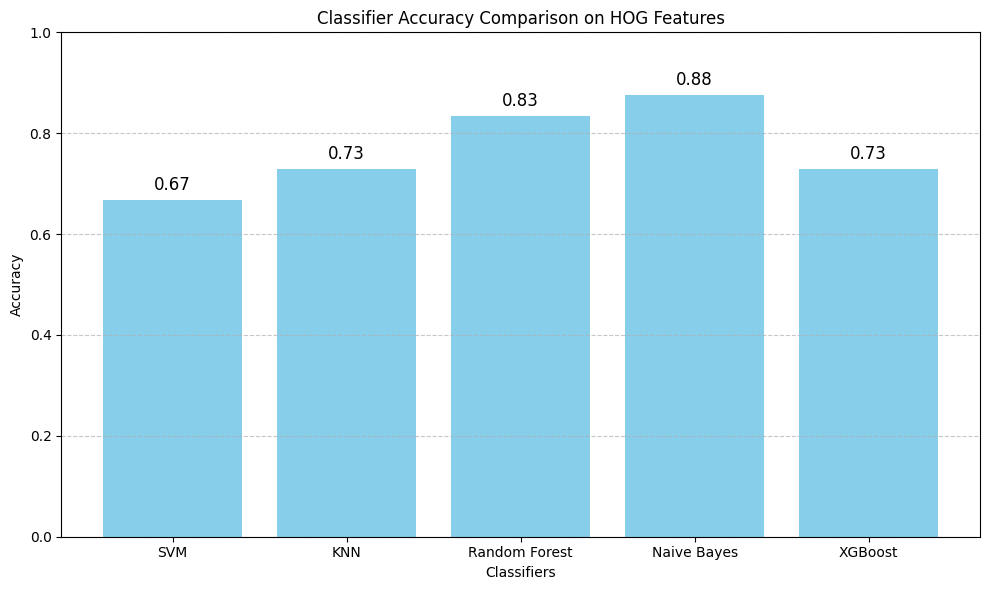

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylim(0, 1)
plt.title('Classifier Accuracy Comparison on HOG Features')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (clf, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
for model, acc in accuracies.items():
    print(f"{model} Accuracy: {acc:.4f}")

SVM Accuracy: 0.7083
KNN Accuracy: 0.6667
Random Forest Accuracy: 0.8125
Naive Bayes Accuracy: 0.7917
XGBoost Accuracy: 0.7500


LBP

In [ ]:
from skimage.feature import local_binary_pattern
import cv2

def extract_lbp_features(images, P=8, R=1):
    lbp_features = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        lbp = local_binary_pattern(gray_img, P, R, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, P + 3),
                                 range=(0, P + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        lbp_features.append(hist)
    return np.array(lbp_features)

X_lbp = extract_lbp_features(X)
print("LBP feature shape:", X_lbp.shape)

LBP feature shape: (240, 10)


In [ ]:
from sklearn.model_selection import train_test_split
X_lbp_train, X_lbp_test, y_lbp_train, y_lbp_test = train_test_split(X_lbp, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_lbp = SVC(kernel='linear')
svm_lbp.fit(X_lbp_train, y_lbp_train)
y_pred_svm = svm_lbp.predict(X_lbp_test)

acc_svm = accuracy_score(y_lbp_test, y_pred_svm)
prec_svm = precision_score(y_lbp_test, y_pred_svm)
rec_svm = recall_score(y_lbp_test, y_pred_svm)
f1_svm = f1_score(y_lbp_test, y_pred_svm)

print("SVM (LBP) - Accuracy:", acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 Score:", f1_svm)

SVM (LBP) - Accuracy: 0.7291666666666666
Precision: 0.8666666666666667
Recall: 0.5416666666666666
F1 Score: 0.6666666666666666


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_lbp = KNeighborsClassifier(n_neighbors=3)
knn_lbp.fit(X_lbp_train, y_lbp_train)
y_pred_knn = knn_lbp.predict(X_lbp_test)

acc_knn = accuracy_score(y_lbp_test, y_pred_knn)
prec_knn = precision_score(y_lbp_test, y_pred_knn)
rec_knn = recall_score(y_lbp_test, y_pred_knn)
f1_knn = f1_score(y_lbp_test, y_pred_knn)

print("KNN (LBP) - Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)

KNN (LBP) - Accuracy: 0.6041666666666666
Precision: 0.6086956521739131
Recall: 0.5833333333333334
F1 Score: 0.5957446808510638


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_lbp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lbp.fit(X_lbp_train, y_lbp_train)
y_pred_rf = rf_lbp.predict(X_lbp_test)

acc_rf = accuracy_score(y_lbp_test, y_pred_rf)
prec_rf = precision_score(y_lbp_test, y_pred_rf)
rec_rf = recall_score(y_lbp_test, y_pred_rf)
f1_rf = f1_score(y_lbp_test, y_pred_rf)

print("Random Forest (LBP) - Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)

Random Forest (LBP) - Accuracy: 0.7291666666666666
Precision: 0.8235294117647058
Recall: 0.5833333333333334
F1 Score: 0.6829268292682927


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_lbp = GaussianNB()
nb_lbp.fit(X_lbp_train, y_lbp_train)
y_pred_nb = nb_lbp.predict(X_lbp_test)

acc_nb = accuracy_score(y_lbp_test, y_pred_nb)
prec_nb = precision_score(y_lbp_test, y_pred_nb)
rec_nb = recall_score(y_lbp_test, y_pred_nb)
f1_nb = f1_score(y_lbp_test, y_pred_nb)

print("Naive Bayes (LBP) - Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", rec_nb)
print("F1 Score:", f1_nb)

Naive Bayes (LBP) - Accuracy: 0.7083333333333334
Precision: 0.8571428571428571
Recall: 0.5
F1 Score: 0.631578947368421


In [ ]:
from xgboost import XGBClassifier

xgb_lbp = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_lbp.fit(X_lbp_train, y_lbp_train)
y_pred_xgb = xgb_lbp.predict(X_lbp_test)

acc_xgb = accuracy_score(y_lbp_test, y_pred_xgb)
prec_xgb = precision_score(y_lbp_test, y_pred_xgb)
rec_xgb = recall_score(y_lbp_test, y_pred_xgb)
f1_xgb = f1_score(y_lbp_test, y_pred_xgb)

print("XGBoost (LBP) - Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", rec_xgb)
print("F1 Score:", f1_xgb)

XGBoost (LBP) - Accuracy: 0.7291666666666666
Precision: 0.7894736842105263
Recall: 0.625
F1 Score: 0.6976744186046512


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:07:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


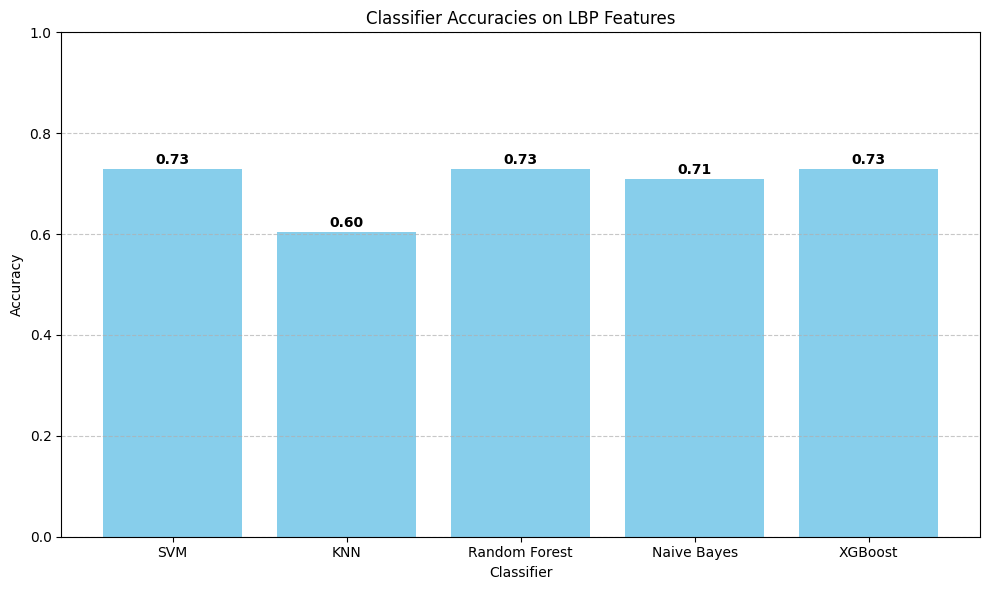

In [ ]:
import matplotlib.pyplot as plt

accuracy_scores_lbp = {
    'SVM': acc_svm,
    'KNN': acc_knn,
    'Random Forest': acc_rf,
    'Naive Bayes': acc_nb,
    'XGBoost': acc_xgb
}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores_lbp.keys(), accuracy_scores_lbp.values(), color='skyblue')
plt.title('Classifier Accuracies on LBP Features')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_scores_lbp.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

HOG + LBP

In [ ]:
# HOG accuracy scores
accuracy_scores_hog = {
    'SVM': accuracies['SVM'],
    'KNN': accuracies['KNN'],
    'Random Forest': accuracies['Random Forest'],
    'Naive Bayes': accuracies['Naive Bayes'],
    'XGBoost': accuracies['XGBoost']
}

# LBP accuracy scores
accuracy_scores_lbp = {
    'SVM': acc_svm,
    'KNN': acc_knn,
    'Random Forest': acc_rf,
    'Naive Bayes': acc_nb,
    'XGBoost': acc_xgb
}

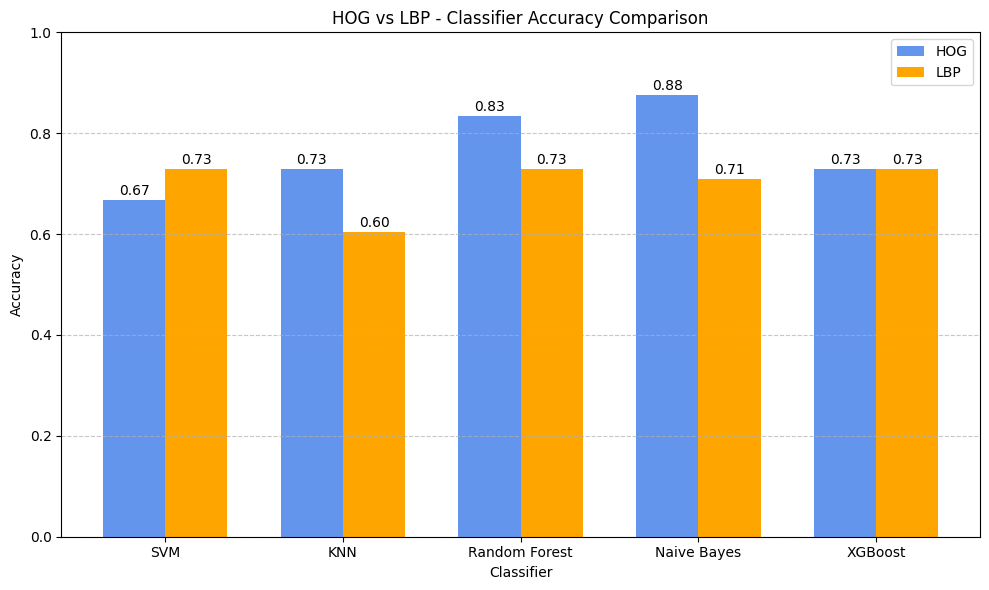

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classifiers
classifiers = list(accuracy_scores_hog.keys())

# Accuracies
hog_values = [accuracy_scores_hog[clf] for clf in classifiers]
lbp_values = [accuracy_scores_lbp[clf] for clf in classifiers]

x = np.arange(len(classifiers))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, hog_values, width, label='HOG', color='cornflowerblue')
plt.bar(x + width/2, lbp_values, width, label='LBP', color='orange')

for i in range(len(classifiers)):
    plt.text(x[i] - width/2, hog_values[i] + 0.01, f"{hog_values[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, lbp_values[i] + 0.01, f"{lbp_values[i]:.2f}", ha='center')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('HOG vs LBP - Classifier Accuracy Comparison')
plt.xticks(x, classifiers)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Combine HOG and LBP features
X_combined = np.hstack((X_hog, X_lbp))
print("Combined feature shape:", X_combined.shape)

Combined feature shape: (240, 1774)


In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
svm_combined = SVC(kernel='linear', random_state=42)
svm_combined.fit(X_train_c, y_train_c)

# Predict
y_pred_svm_c = svm_combined.predict(X_test_c)

# Metrics
accuracy_svm_c = accuracy_score(y_test_c, y_pred_svm_c)
precision_svm_c = precision_score(y_test_c, y_pred_svm_c, average='macro')
recall_svm_c = recall_score(y_test_c, y_pred_svm_c, average='macro')
f1_svm_c = f1_score(y_test_c, y_pred_svm_c, average='macro')
report_svm_c = classification_report(y_test_c, y_pred_svm_c)

# Print
print("=== SVM (Combined HOG + LBP) ===")
print(f"Accuracy:  {accuracy_svm_c:.4f}")
print(f"Precision: {precision_svm_c:.4f}")
print(f"Recall:    {recall_svm_c:.4f}")
print(f"F1-score:  {f1_svm_c:.4f}")
print("\nClassification Report:\n", report_svm_c)

=== SVM (Combined HOG + LBP) ===
Accuracy:  0.6667
Precision: 0.6678
Recall:    0.6667
F1-score:  0.6661

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        24
           1       0.68      0.62      0.65        24

    accuracy                           0.67        48
   macro avg       0.67      0.67      0.67        48
weighted avg       0.67      0.67      0.67        48



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
knn_combined = KNeighborsClassifier(n_neighbors=3)
knn_combined.fit(X_train_c, y_train_c)

# Predict
y_pred_knn_c = knn_combined.predict(X_test_c)

accuracy_knn_c = accuracy_score(y_test_c, y_pred_knn_c)
precision_knn_c = precision_score(y_test_c, y_pred_knn_c, average='macro')
recall_knn_c = recall_score(y_test_c, y_pred_knn_c, average='macro')
f1_knn_c = f1_score(y_test_c, y_pred_knn_c, average='macro')
report_knn_c = classification_report(y_test_c, y_pred_knn_c)

print("=== KNN (Combined HOG + LBP) ===")
print(f"Accuracy:  {accuracy_knn_c:.4f}")
print(f"Precision: {precision_knn_c:.4f}")
print(f"Recall:    {recall_knn_c:.4f}")
print(f"F1-score:  {f1_knn_c:.4f}")
print("\nClassification Report:\n", report_knn_c)


=== KNN (Combined HOG + LBP) ===
Accuracy:  0.7292
Precision: 0.7667
Recall:    0.7292
F1-score:  0.7193

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67        24
           1       0.67      0.92      0.77        24

    accuracy                           0.73        48
   macro avg       0.77      0.73      0.72        48
weighted avg       0.77      0.73      0.72        48



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_combined.fit(X_train_c, y_train_c)

# Predict
y_pred_rf_c = rf_combined.predict(X_test_c)

accuracy_rf_c = accuracy_score(y_test_c, y_pred_rf_c)
precision_rf_c = precision_score(y_test_c, y_pred_rf_c, average='macro')
recall_rf_c = recall_score(y_test_c, y_pred_rf_c, average='macro')
f1_rf_c = f1_score(y_test_c, y_pred_rf_c, average='macro')
report_rf_c = classification_report(y_test_c, y_pred_rf_c)

print("=== Random Forest (Combined HOG + LBP) ===")
print(f"Accuracy:  {accuracy_rf_c:.4f}")
print(f"Precision: {precision_rf_c:.4f}")
print(f"Recall:    {recall_rf_c:.4f}")
print(f"F1-score:  {f1_rf_c:.4f}")
print("\nClassification Report:\n", report_rf_c)

=== Random Forest (Combined HOG + LBP) ===
Accuracy:  0.7917
Precision: 0.8000
Recall:    0.7917
F1-score:  0.7902

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.75      0.88      0.81        24

    accuracy                           0.79        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.80      0.79      0.79        48



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
nb_combined = GaussianNB()
nb_combined.fit(X_train_c, y_train_c)

# Predict
y_pred_nb_c = nb_combined.predict(X_test_c)

accuracy_nb_c = accuracy_score(y_test_c, y_pred_nb_c)
precision_nb_c = precision_score(y_test_c, y_pred_nb_c, average='macro')
recall_nb_c = recall_score(y_test_c, y_pred_nb_c, average='macro')
f1_nb_c = f1_score(y_test_c, y_pred_nb_c, average='macro')
report_nb_c = classification_report(y_test_c, y_pred_nb_c)

print("=== Naive Bayes (Combined HOG + LBP) ===")
print(f"Accuracy:  {accuracy_nb_c:.4f}")
print(f"Precision: {precision_nb_c:.4f}")
print(f"Recall:    {recall_nb_c:.4f}")
print(f"F1-score:  {f1_nb_c:.4f}")
print("\nClassification Report:\n", report_nb_c)

=== Naive Bayes (Combined HOG + LBP) ===
Accuracy:  0.8542
Precision: 0.8598
Recall:    0.8542
F1-score:  0.8536

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.81      0.92      0.86        24

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
xgb_combined = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_combined.fit(X_train_c, y_train_c)

# Predict
y_pred_xgb_c = xgb_combined.predict(X_test_c)

accuracy_xgb_c = accuracy_score(y_test_c, y_pred_xgb_c)
precision_xgb_c = precision_score(y_test_c, y_pred_xgb_c, average='macro')
recall_xgb_c = recall_score(y_test_c, y_pred_xgb_c, average='macro')
f1_xgb_c = f1_score(y_test_c, y_pred_xgb_c, average='macro')
report_xgb_c = classification_report(y_test_c, y_pred_xgb_c)

print("=== XGBoost (Combined HOG + LBP) ===")
print(f"Accuracy:  {accuracy_xgb_c:.4f}")
print(f"Precision: {precision_xgb_c:.4f}")
print(f"Recall:    {recall_xgb_c:.4f}")
print(f"F1-score:  {f1_xgb_c:.4f}")
print("\nClassification Report:\n", report_xgb_c)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:29:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost (Combined HOG + LBP) ===
Accuracy:  0.7917
Precision: 0.7917
Recall:    0.7917
F1-score:  0.7917

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.79      0.79      0.79        24

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



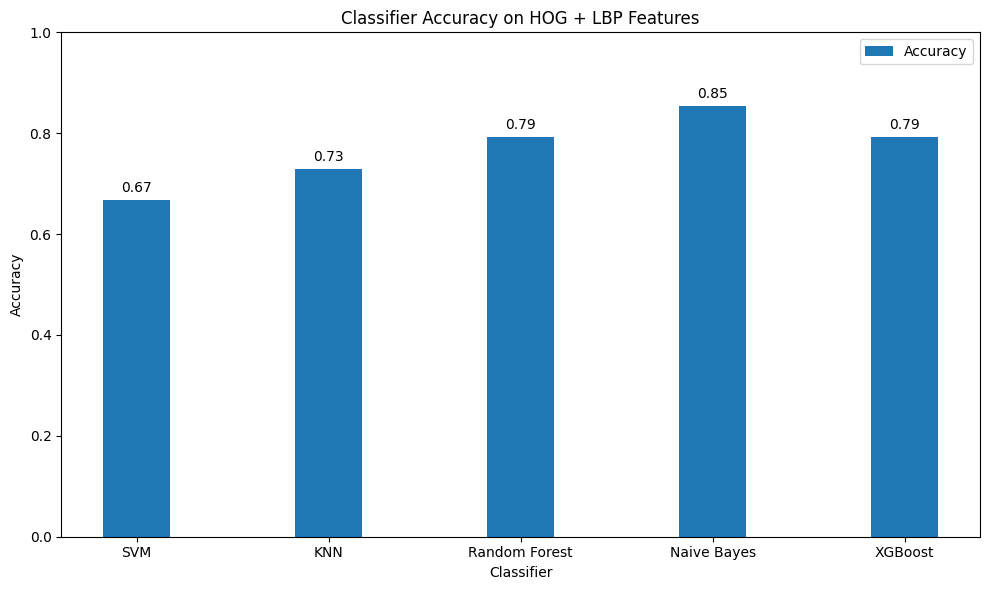

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hog_lbp_results = {
    'SVM': {'accuracy': accuracy_svm_c, 'precision': precision_svm_c, 'recall': recall_svm_c, 'f1': f1_svm_c},
    'KNN': {'accuracy': accuracy_knn_c, 'precision': precision_knn_c, 'recall': recall_knn_c, 'f1': f1_knn_c},
    'Random Forest': {'accuracy': accuracy_rf_c, 'precision': precision_rf_c, 'recall': recall_rf_c, 'f1': f1_rf_c},
    'Naive Bayes': {'accuracy': accuracy_nb_c, 'precision': precision_nb_c, 'recall': recall_nb_c, 'f1': f1_nb_c},
    'XGBoost': {'accuracy': accuracy_xgb_c, 'precision': precision_xgb_c, 'recall': recall_xgb_c, 'f1': f1_xgb_c}
}

metrics = ['accuracy']
classifiers = list(hog_lbp_results.keys())

values = {metric: [hog_lbp_results[clf][metric] for clf in classifiers] for metric in metrics}

x = np.arange(len(classifiers))
width = 0.35

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    bars = plt.bar(x + i*width, values[metric], width=width, label=metric.capitalize())
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy on HOG + LBP Features")
plt.xticks(x, classifiers)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

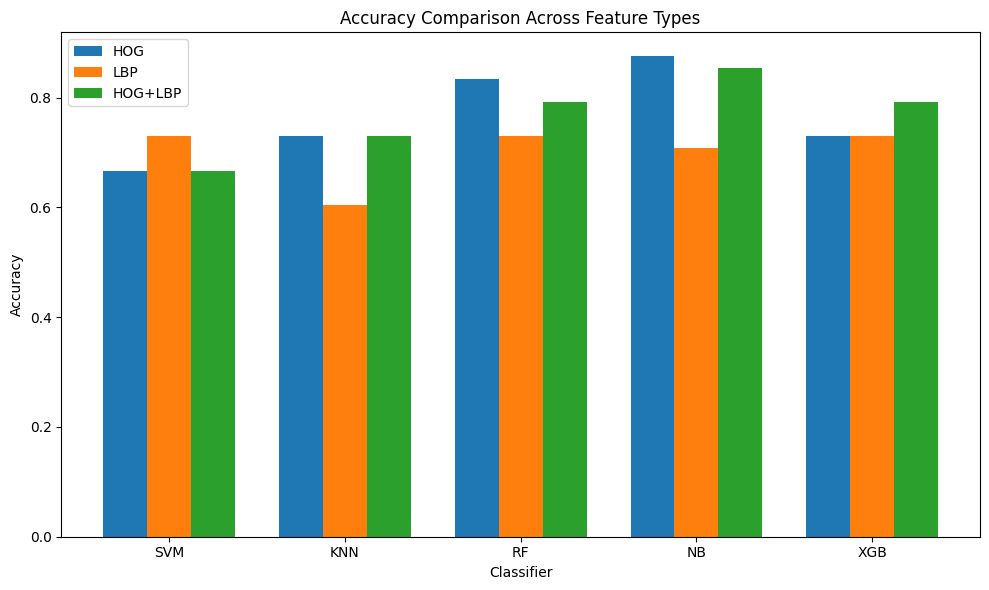

In [ ]:
accuracy_scores = {
    'SVM': {'HOG': accuracies['SVM'], 'LBP': acc_svm, 'HOG+LBP': accuracy_svm_c},
    'KNN': {'HOG': accuracies['KNN'], 'LBP': acc_knn, 'HOG+LBP': accuracy_knn_c},
    'RF': {'HOG': accuracies['Random Forest'], 'LBP': acc_rf, 'HOG+LBP': accuracy_rf_c},
    'NB': {'HOG': accuracies['Naive Bayes'], 'LBP': acc_nb, 'HOG+LBP': accuracy_nb_c},
    'XGB': {'HOG': accuracies['XGBoost'], 'LBP': acc_xgb, 'HOG+LBP': accuracy_xgb_c},
}

classifiers = list(accuracy_scores.keys())
feature_types = ['HOG', 'LBP', 'HOG+LBP']

x = np.arange(len(classifiers))
width = 0.25

plt.figure(figsize=(10,6))
for i, ft in enumerate(feature_types):
    plt.bar(x + i*width, [accuracy_scores[clf][ft] for clf in classifiers], width=width, label=ft)

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Feature Types")
plt.xticks(x + width, classifiers)
plt.legend()
plt.tight_layout()
plt.show()